# Spam Message Classification #


## 1) Data Preprocessing

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
spam_df = pd.read_csv('spam.tsv', sep = '\t')

In [8]:
spam_df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [11]:
#Check whether we have missing records
spam_df.isna().sum()

#isna() will return True where there is a null value. Sum will add up all the Trues.
# A non zero in any column will suggest a missing value was found in that column

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
spam_df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [16]:
#Grab how many records have the 'ham' label and how many have the 'spam' label

spam_df['label'].value_counts()/(len(spam_df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

From the output of the cell above we can see that the dataset contains an inbalance in the proportion of spam vs ham labels. Thus in extracting data to train a classifier, we need to ensure that our dataset is not biased and contains an equal representation of both classes

In [22]:
#Get a subset of data based on whether it contains the 'ham' label
ham = spam_df[spam_df['label'] == 'ham']

In [20]:
spam = spam_df[spam_df['label'] == 'spam']

In [24]:
# print the shape of the dataset. Both contain 4 columns. But ham has 4825 rows while spam has 747 rows
ham.shape, spam.shape


((4825, 4), (747, 4))

In [25]:
# Get a random sample of n rows from ham where n is the number of rows of spam
ham= ham.sample(spam.shape[0])

In [29]:
#See that ham.shape == spam.shape
ham.shape == spam.shape

True

In [33]:
#Now we can create a new dataset that contains both ham and spam messages

data = ham.append(spam, ignore_index=True)

<ipython-input-33-4682de3dd36e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [57]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

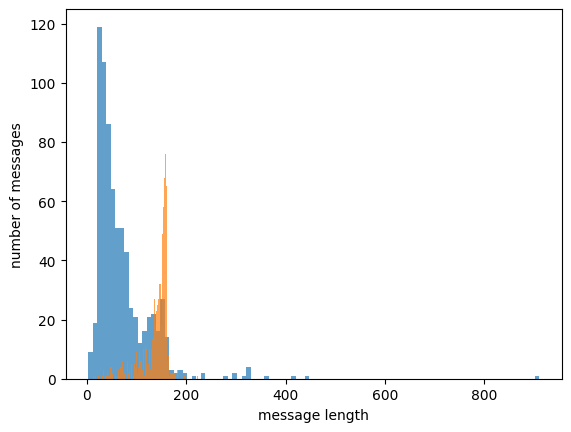

In [58]:
# Lets visualize the data in ham as a histogram so we understand the length of the messages
plt.hist(data[data['label']== 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']== 'spam']['length'], bins = 100, alpha = 0.7)
plt.xlabel('message length')
plt.ylabel('number of messages')
plt.show()

The data shows that the spam category (organge) tends to be higher length than the ham category

In [48]:
print(data[data['label']=='ham'])

    label                                            message  length  punct
0     ham  Where are you ? What do you do ? How can you s...     154      9
1     ham  HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...     152      1
2     ham  alright babe, justthought id sayhey! how u do...     136      6
3     ham  If I get there before you after your ten billi...      79      0
4     ham                             Sorry, I'll call later      22      2
..    ...                                                ...     ...    ...
742   ham   Uhhhhrmm isnt having tb test bad when youre sick      48      0
743   ham  I am going to sao mu today. Will be done only ...      52      1
744   ham  Ever green quote ever told by Jerry in cartoon...     159     15
745   ham     Do u noe wat time e place dat sells 4d closes?      46      1
746   ham  To the wonderful Okors, have a great month. We...     101      3

[747 rows x 4 columns]


## Training the Spam Classification Model